# Time Series Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

/var/folders/09/sb1ltk754rvgdzk60z7z18400000gn/T/ipykernel_96493/3516498515.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ppg = pd.read_csv('../data/ieeeppg.csv', delimiter=';')
sensor = pd.read_csv('../data/sensor.csv')

In [3]:
ppg.head()

,PPG1,PPG2,x-accelerometer,y-accelerometer,z-accelerometer
0,"[-23.0, -24.0, -26.5, -27.0, -30.0, -30.0, -28...","[4.0, 6.0, 3.0, 3.5, 0.0, 2.0, 3.0, 3.5, 3.0, ...","[-0.0702, -0.0702, -0.054599999999999996, -0.0...","[0.3432, 0.3588, 0.3666, 0.3666, 0.37439999999...","[0.9593999999999999, 0.9438, 0.935999999999999..."
1,"[-20.5, -19.0, -20.0, -19.5, -20.5, -18.5, -19...","[-37.0, -38.5, -40.5, -41.5, -42.0, -41.0, -39...","[0.40559999999999996, 0.42119999999999996, 0.4...","[0.6083999999999999, 0.6162, 0.608399999999999...","[0.5147999999999999, 0.4992, 0.4758, 0.4602, 0..."
2,"[22.0, 23.5, 22.5, 23.5, 22.5, 21.5, 20.5, 19....","[12.5, 13.5, 11.5, 13.5, 13.5, 12.5, 11.5, 11....","[0.4758, 0.4758, 0.4758, 0.46799999999999997, ...","[0.6864, 0.6864, 0.6864, 0.6786, 0.6864, 0.686...","[0.38999999999999996, 0.38999999999999996, 0.3..."
3,"[-5.5, -5.5, -6.5, -6.5, -7.0, -7.0, -6.5, -7....","[-1.0, -0.5, -1.5, -1.0, 0.0, -0.5, -0.5, -1.0...","[0.4602, 0.4602, 0.4602, 0.4602, 0.4602, 0.452...","[0.6708, 0.6786, 0.6708, 0.6708, 0.6786, 0.686...","[0.3978, 0.4134, 0.40559999999999996, 0.405599..."
4,"[30.5, 27.0, 26.0, 24.0, 21.5, 20.5, 18.0, 16....","[74.5, 70.0, 67.0, 62.5, 57.5, 54.0, 49.5, 44....","[0.6162, 0.6162, 0.624, 0.6083999999999999, 0....","[0.7098, 0.6941999999999999, 0.6786, 0.6708, 0...","[0.3978, 0.38999999999999996, 0.37439999999999..."


Nos encontramos con una tabla de listas. Cada fila dentro de la tabla PPG es un paciente.

In [4]:
sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
ppg['PPG1'][0] #esto es el primer paciente

'[-23.0, -24.0, -26.5, -27.0, -30.0, -30.0, -28.5, -28.0, -29.0, -29.0, -27.0, -24.5, -23.5, -23.0, -21.5, -19.0, -17.5, -17.5, -15.0, -16.0, -14.0, -13.5, -14.0, -13.0, -14.0, -14.5, -15.5, -16.5, -18.0, -20.5, -19.5, -20.0, -23.5, -24.0, -26.0, -25.5, -26.0, -28.0, -29.5, -31.0, -30.5, -31.5, -34.0, -36.0, -37.5, -38.0, -39.0, -41.0, -41.0, -42.0, -41.5, -41.0, -41.5, -40.5, -40.0, -36.5, -37.0, -34.5, -33.5, -31.5, -28.5, -27.5, -27.0, -25.5, -25.0, -22.5, -21.5, -20.5, -17.0, -15.0, -11.0, -8.5, -5.0, 0.0, 5.5, 11.5, 18.5, 24.5, 31.0, 38.5, 44.0, 50.5, 55.5, 58.0, 61.0, 62.5, 65.5, 65.0, 63.5, 63.0, 63.0, 62.0, 59.0, 57.5, 54.5, 54.0, 51.5, 47.5, 45.0, 41.0, 38.5, 34.5, 31.5, 28.5, 24.5, 21.0, 16.5, 14.5, 12.0, 7.0, 7.0, 3.5, 1.5, 0.5, -1.0, -1.0, -1.0, -0.5, -1.5, -1.0, -0.5, -0.5, -0.5, 0.0, -2.0, 0.0, -2.0, -2.5, -2.0, -3.5, -3.0, -4.0, -3.5, -4.5, -7.0, -6.5, -8.0, -9.5, -11.0, -13.5, -14.0, -15.5, -18.0, -19.0, -19.5, -21.5, -22.0, -23.5, -24.0, -24.5, -25.5, -24.5, -24.5, -24

Pero si vemos bien.. encontramos que esta lista es un string, tenemos que transformar a número.

Para esto podemos utilizar la libreria 'json'

In [6]:
for c in ppg.columns:
    ppg[c] = ppg[c].apply(json.loads)

In [7]:
ppg.dtypes

PPG1               object
PPG2               object
x-accelerometer    object
y-accelerometer    object
z-accelerometer    object
dtype: object

### PPG1 sensor on first 5 patients

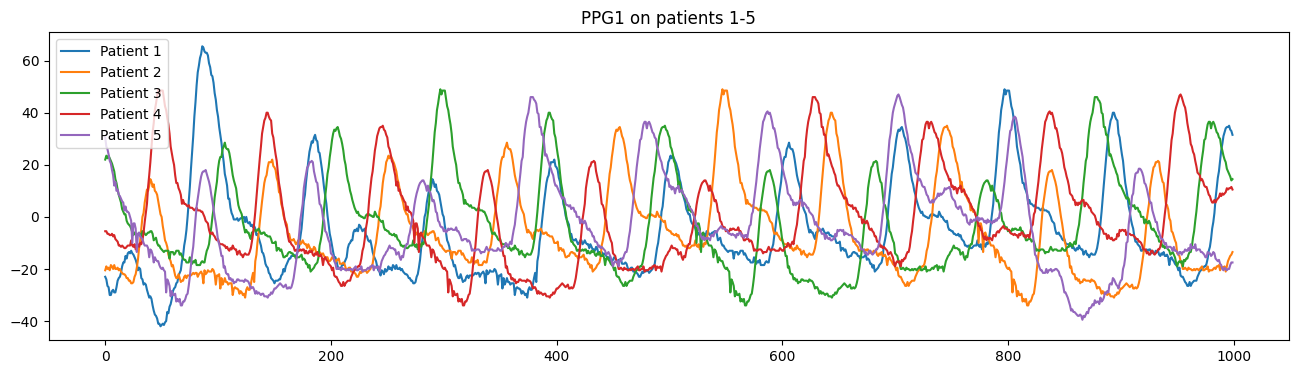

In [8]:
fig, ax = plt.subplots(figsize=(16,4)) #ES MUY IMPORTANTE COLOCAR PRIMERO ESTA LINEA DE CODIGO ANTES DE GRAFICAR
for i in range(5):
    ax.plot(ppg["PPG1"][i], label=f"Patient {i+1}")

ax.set_title('PPG1 on patients 1-5')
ax.legend()
plt.show()


Otra forma más elefante de hacer el plot:

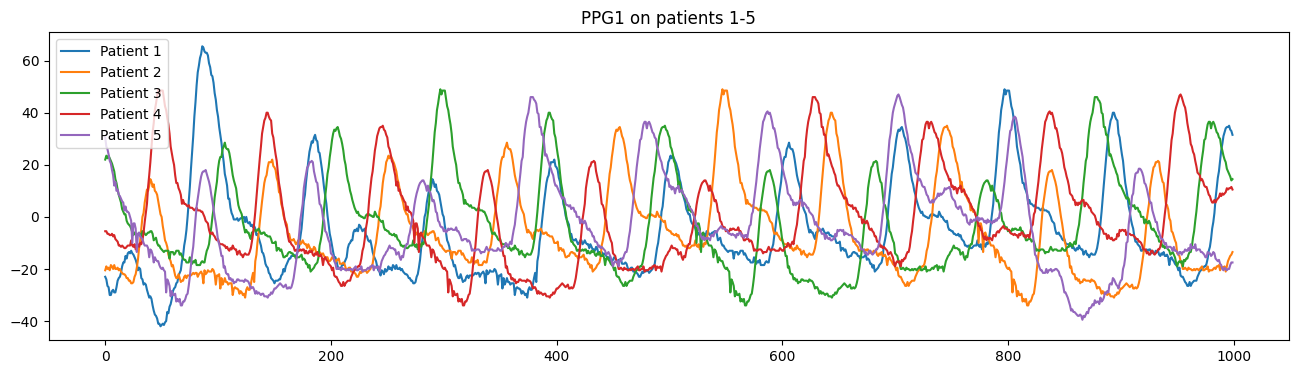

In [9]:
fig, ax = plt.subplots(figsize=(16,4)) #ES MUY IMPORTANTE COLOCAR PRIMERO ESTA LINEA DE CODIGO ANTES DE GRAFICAR
for i, patient_ppg1 in enumerate(ppg["PPG1"][:5]):
    ax.plot(patient_ppg1, label=f"Patient {i+1}")

ax.set_title('PPG1 on patients 1-5')
ax.legend()
plt.show()


### Different Heart beat sensors on same subject

Ahora queremos crear una gráfica de los diferentes sensores pero solamente para el paciente 1.

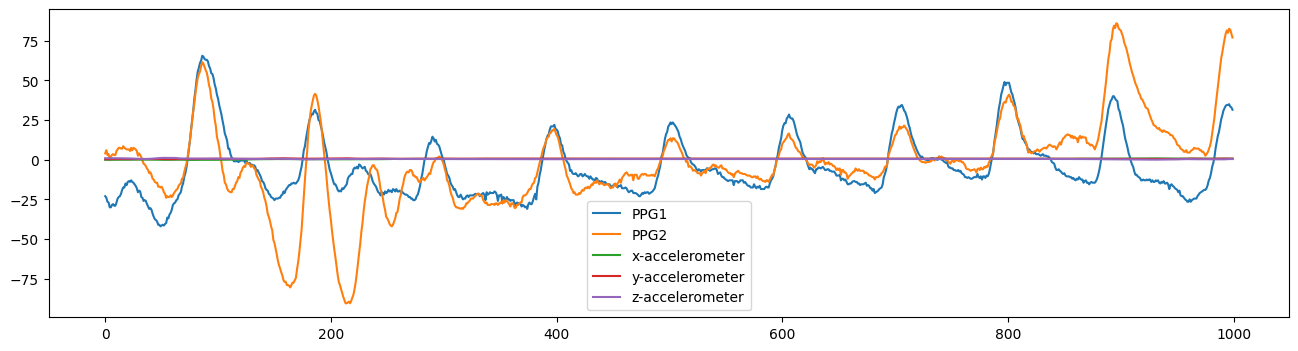

In [10]:
fig, ax = plt.subplots(figsize=(16,4))
patient=ppg.iloc[0] #fijamos el primer paciente
for col in ppg.columns:
    ax.plot(patient[col], label=col)
ax.legend()
plt.show()

Los datos tienen diferentes escalas, los valores de PPG1 son muy grandes en comparación de los acelerómetros.